# Визуализация данных с Matplotlib и Seaborn

## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Считываем датасет
df = pd.read_csv('bank.csv')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
35098,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,may,309,3,355,4,failure,no
44057,63,retired,married,secondary,no,2896,no,no,cellular,1,jul,304,1,119,2,success,yes
10417,48,blue-collar,married,secondary,no,1000,yes,no,unknown,12,jun,1268,2,-1,0,unknown,yes
42931,23,admin.,single,tertiary,no,897,yes,no,cellular,8,feb,190,2,280,8,failure,yes
32480,32,management,single,tertiary,no,8436,yes,no,cellular,17,apr,245,1,149,2,failure,no
5177,33,technician,divorced,secondary,no,4369,yes,no,unknown,21,may,433,3,-1,0,unknown,no
8306,58,retired,married,secondary,no,1604,yes,no,unknown,2,jun,358,3,-1,0,unknown,no
17842,39,management,married,tertiary,no,-409,yes,no,cellular,29,jul,590,23,-1,0,unknown,no
36136,32,blue-collar,married,primary,no,-94,yes,yes,cellular,11,may,308,1,-1,0,unknown,no
18602,58,management,married,tertiary,no,0,no,no,telephone,31,jul,27,16,-1,0,unknown,no


Стандартный синтаксис создания графика.

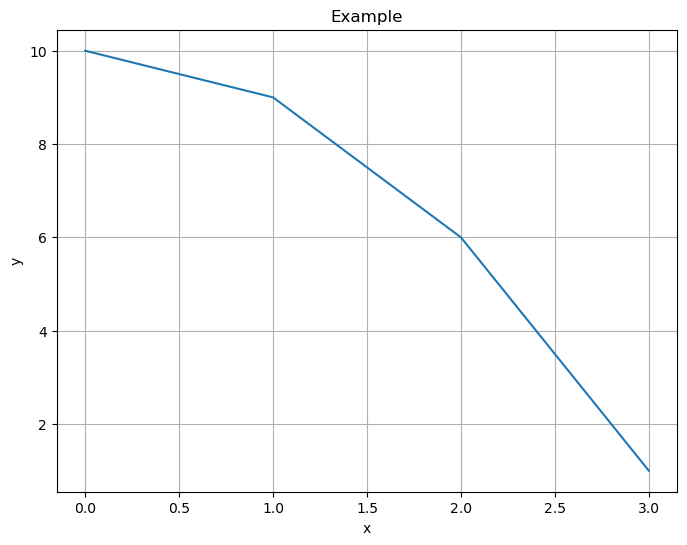

In [4]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков

### Линейный график

In [5]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


#### Matplotlib

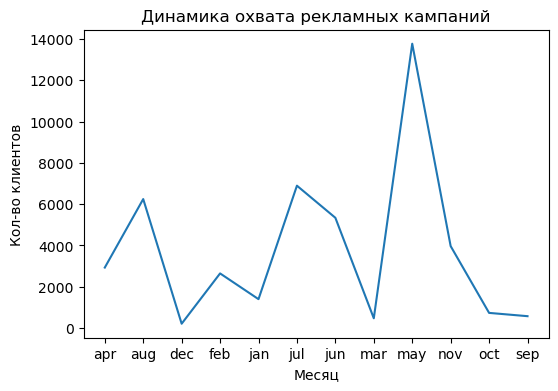

In [6]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

#### Seaborn

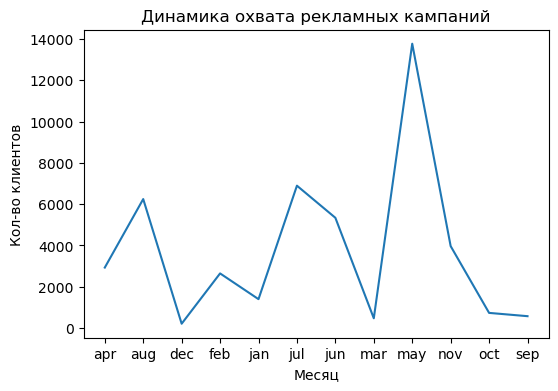

In [7]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

### Гистограмма

#### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

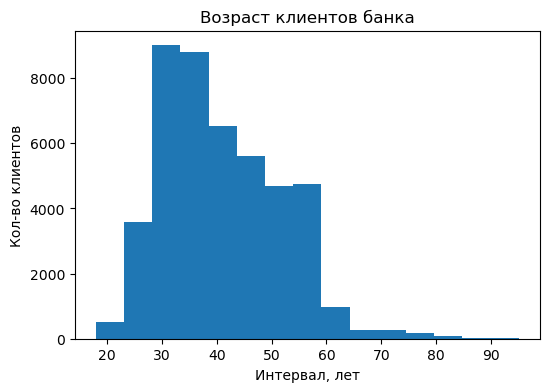

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

#### Seaborn

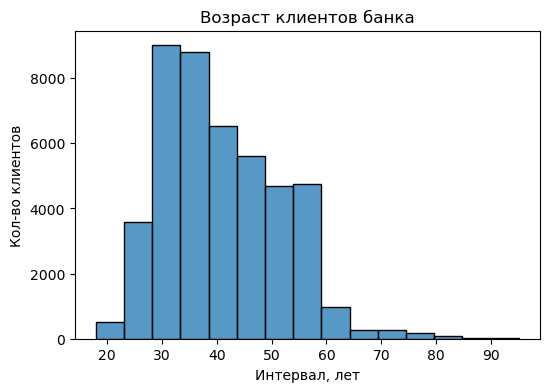

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

### Диаграмма рассеяния

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Столбца 'convert' в лекции нет, поэтому меняем столбец 'deposit' на 'convert'.

In [11]:
df['convert'] = 0
df.loc[df['deposit']=='yes','convert'] = 1

In [12]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
 17  convert    45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


#### Matplotlib

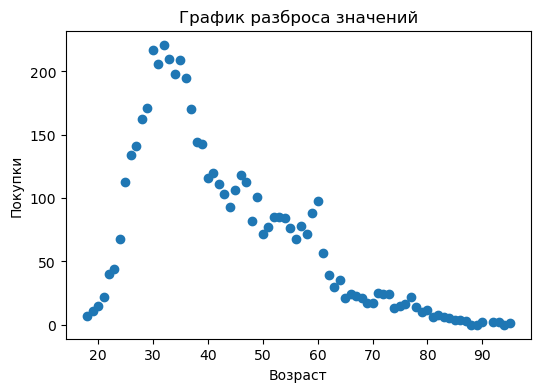

In [14]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

#### Seaborn

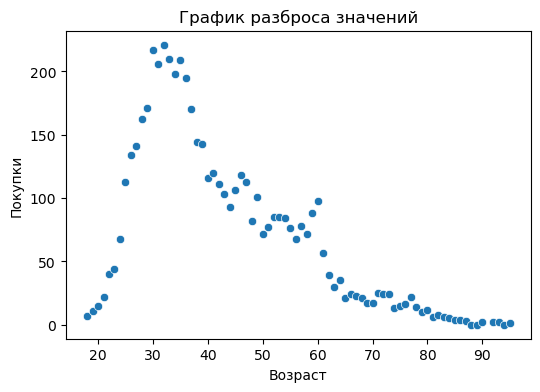

In [15]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

### Столбчатые диаграммы

In [16]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


#### Matplotlib

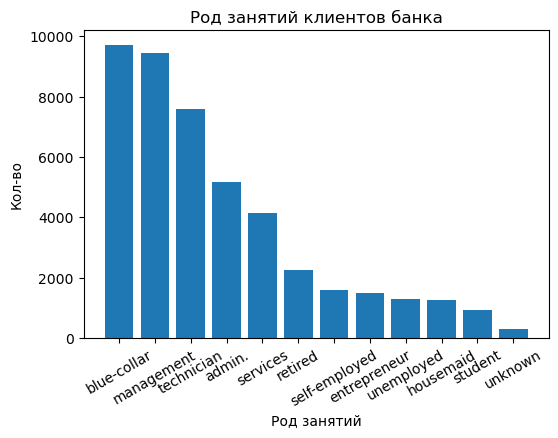

In [17]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

#### Seaborn

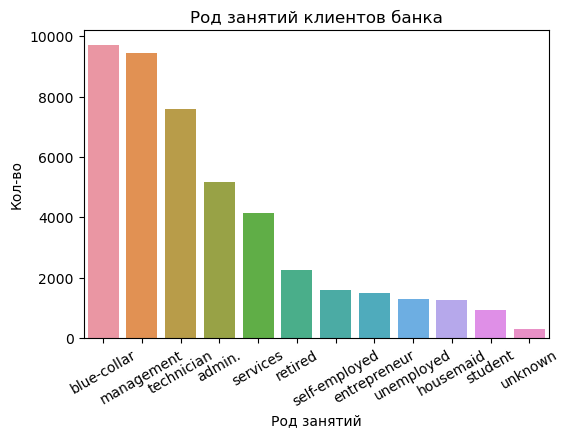

In [18]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### Многорядовые столбчатые диаграммы

In [19]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


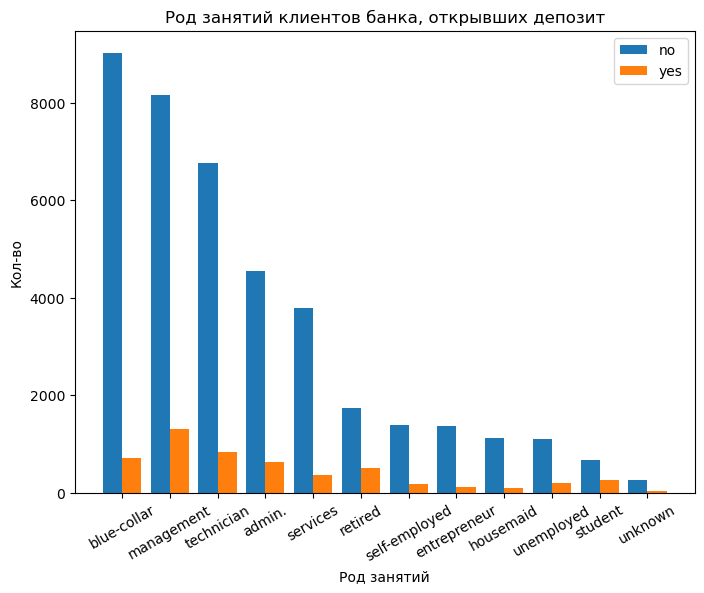

In [20]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

### Сложенная столбчатая диаграмма

In [21]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


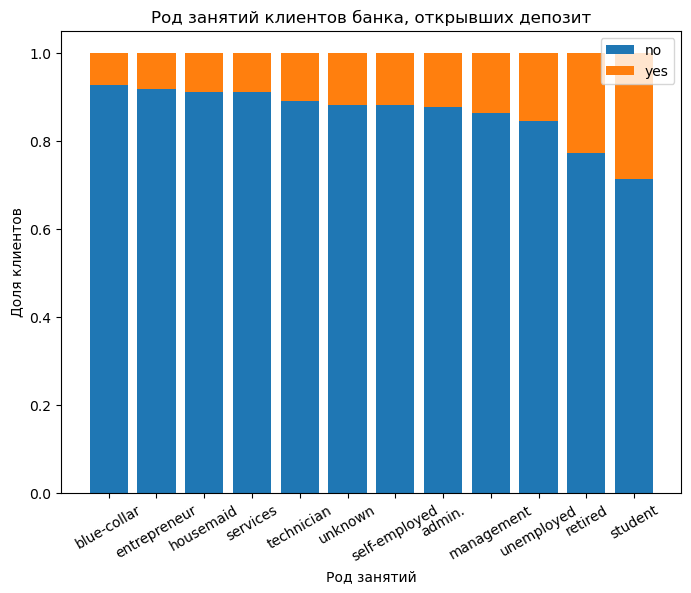

In [22]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

### Ящики с усами

In [23]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

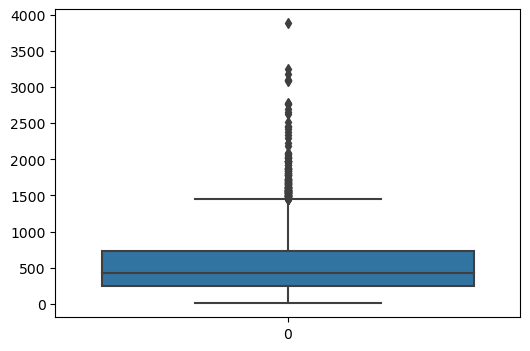

In [24]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

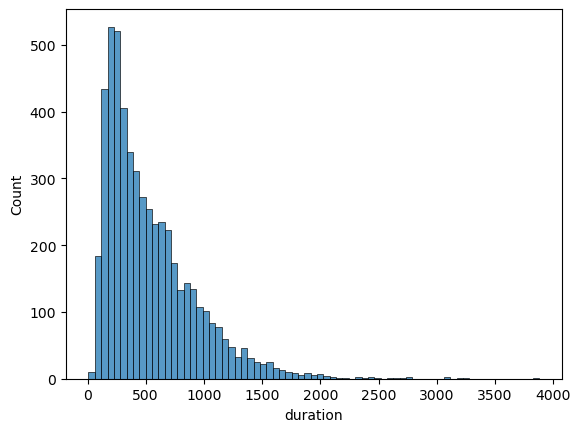

In [25]:
sns.histplot(x=data1);

#### Matplotlib

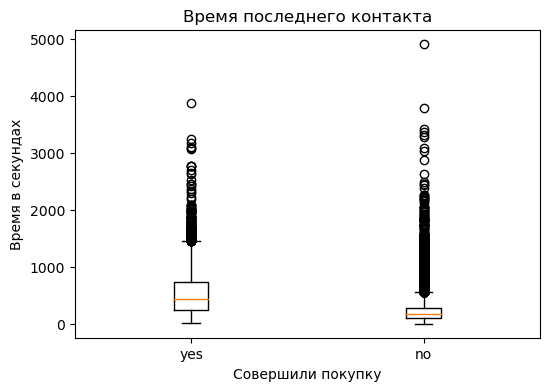

In [26]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

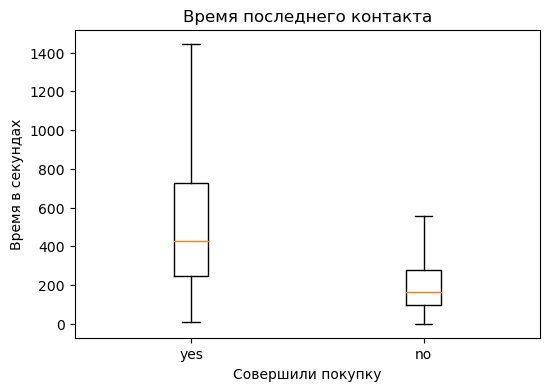

In [27]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

#### Seaborn

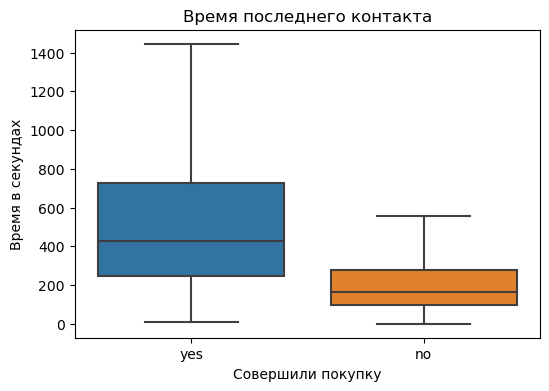

In [28]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

### Круговая диаграмма

In [29]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: convert, dtype: int64

#### Matplotlib

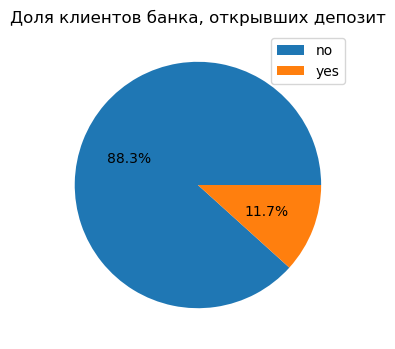

In [30]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

### Визуальный анализ данных

Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* longitude - долгота
* latitude - широта
* housing_median_age - средний возраст дома
* total_rooms - общее количество комнат
* total_bedrooms - общее количество спален
* population - количество проживающих* households - домохозяйства
* ocean_proximity - близость океана
* median_income - средний доход
* median_house_value - средняя стоимость дома

In [31]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


#### Распределение вещественных признаков

In [32]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

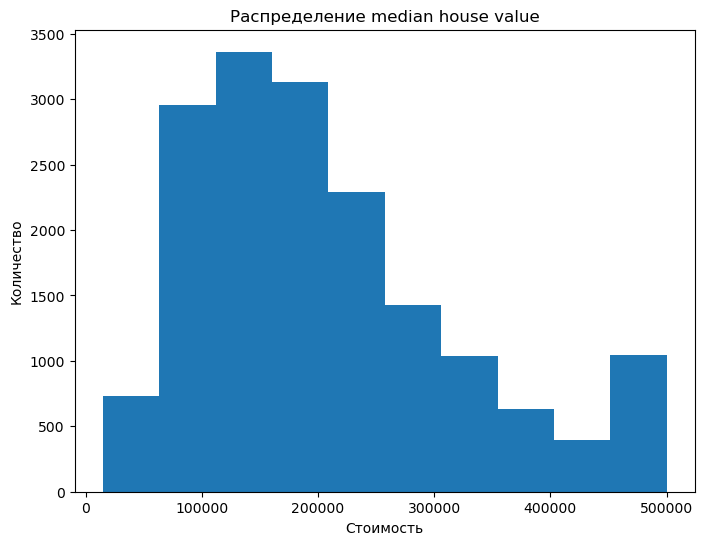

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [34]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

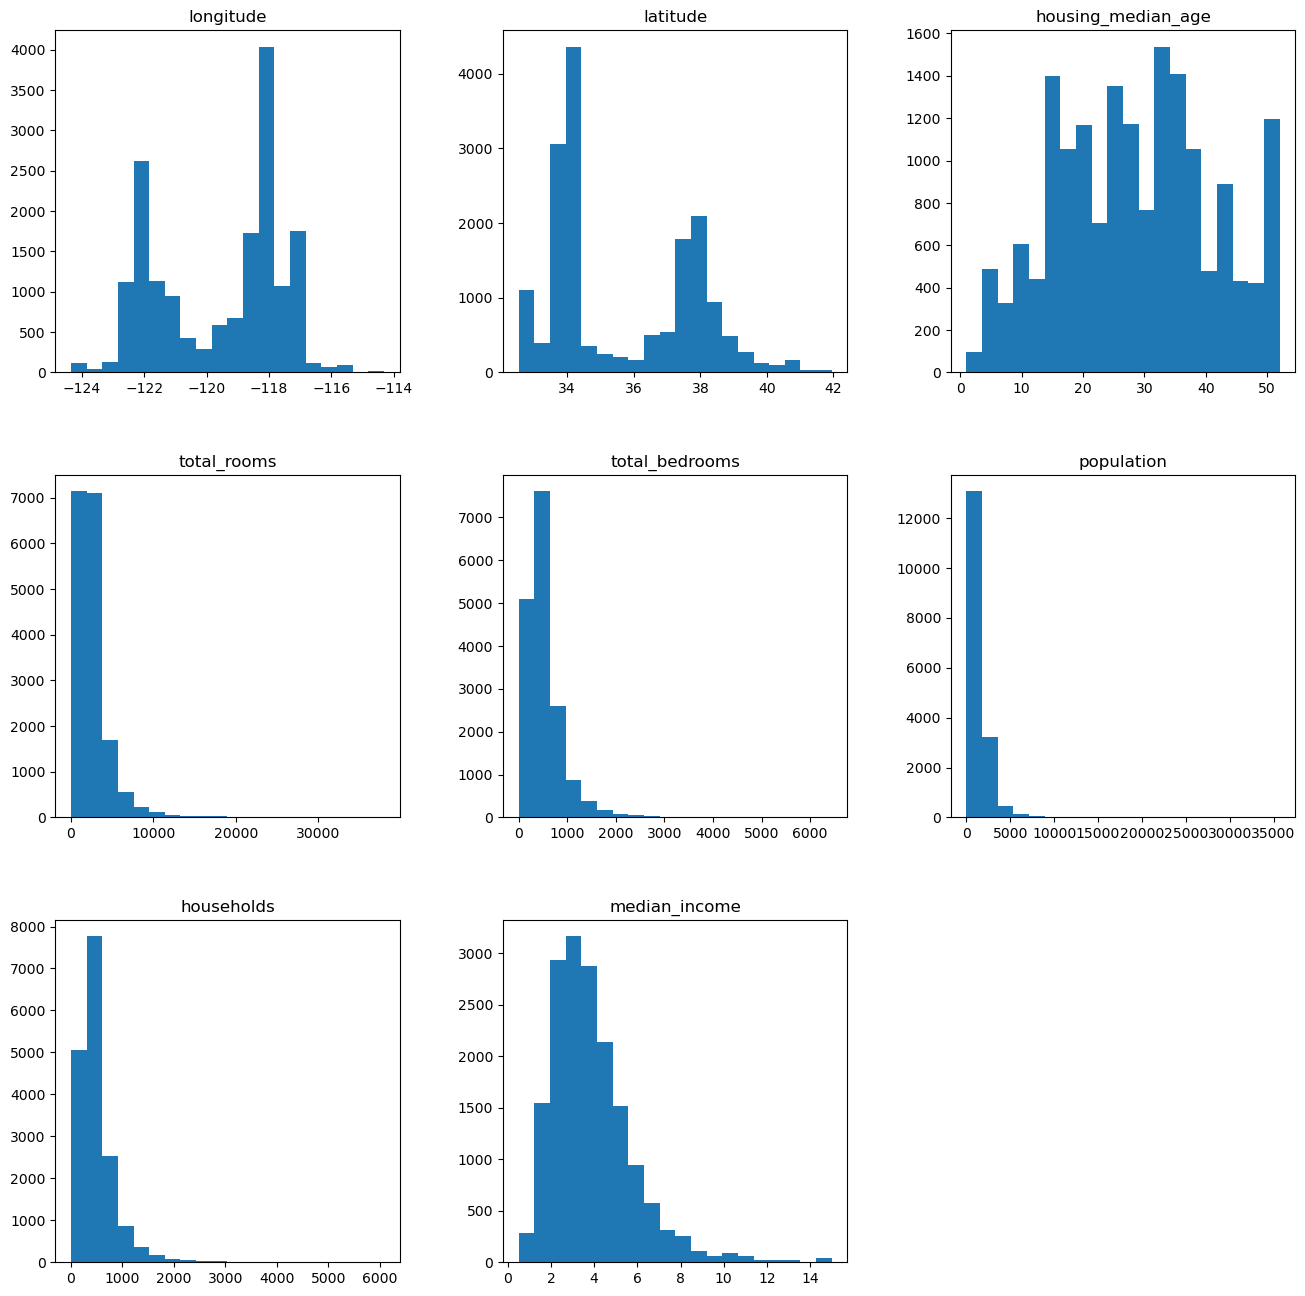

In [35]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

#### Поиск выбросов с помощью box plot

Как строится box plot

Подробное объяснение

* box - от 25% до 75% квантиля
* линия в середине box - медиана
* "усы"

Как строятся "усы" - вариантов масса

* среднее +/- 3 сигма (стандартное отклонение)
* min / max
* median +/- 1.5*(q75 - q25),
* ...

*Интерквартильный размах = q75 - q25

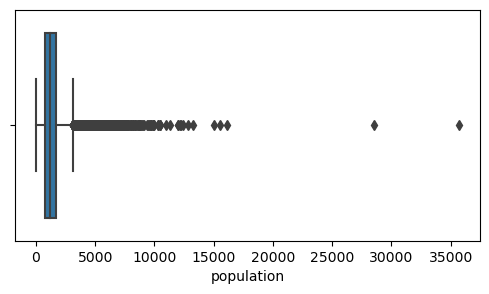

In [36]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

### Анализ категориальных признаков

counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

### Анализ взаимных распределений

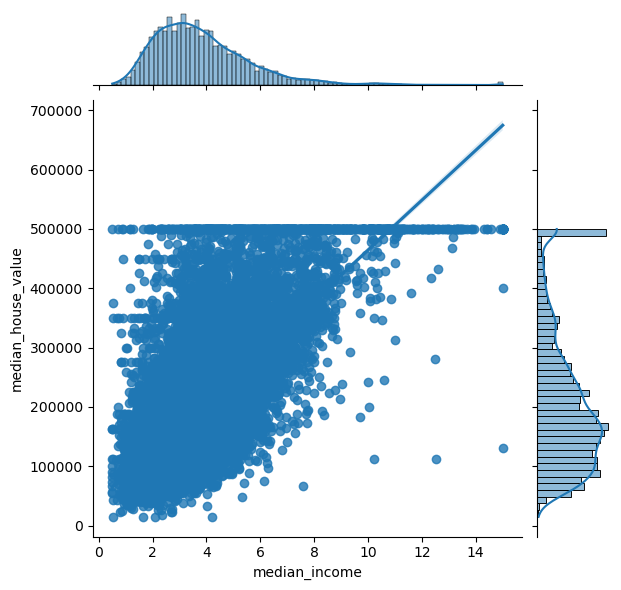

In [37]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

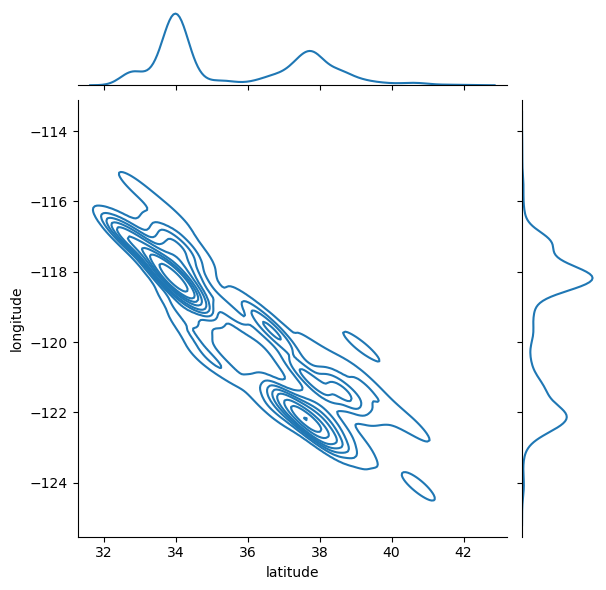

In [38]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

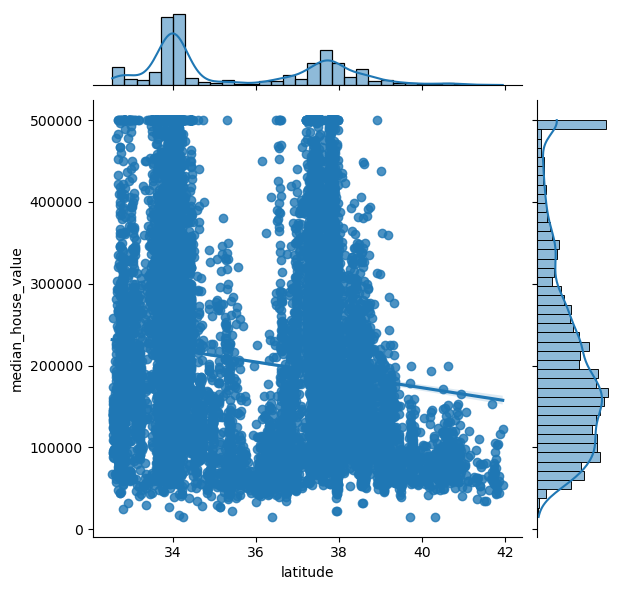

In [39]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

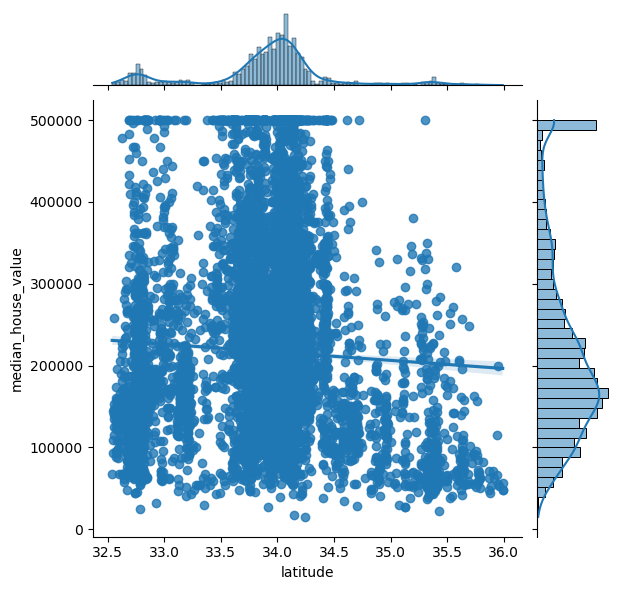

In [40]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

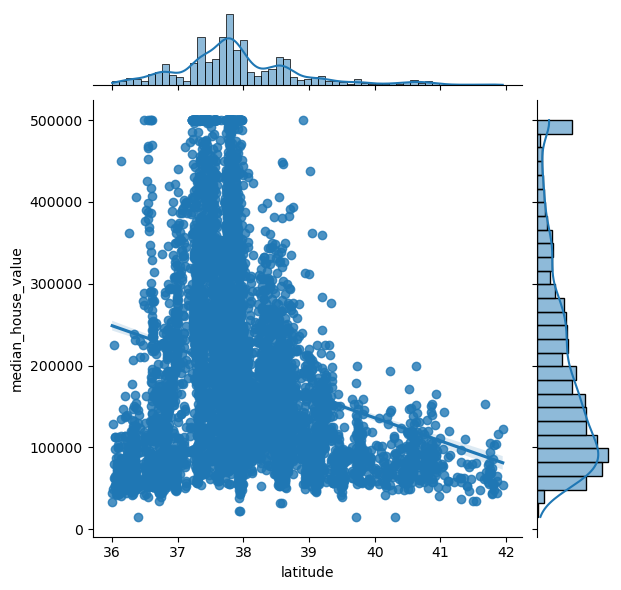

In [41]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

#### longitude

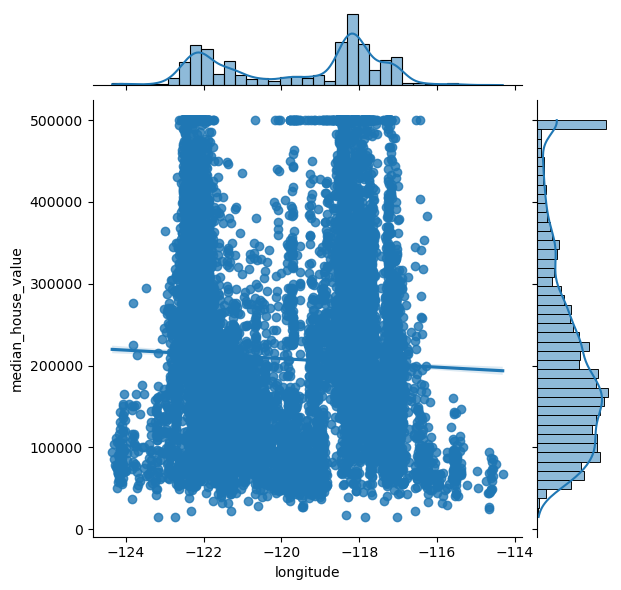

In [42]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

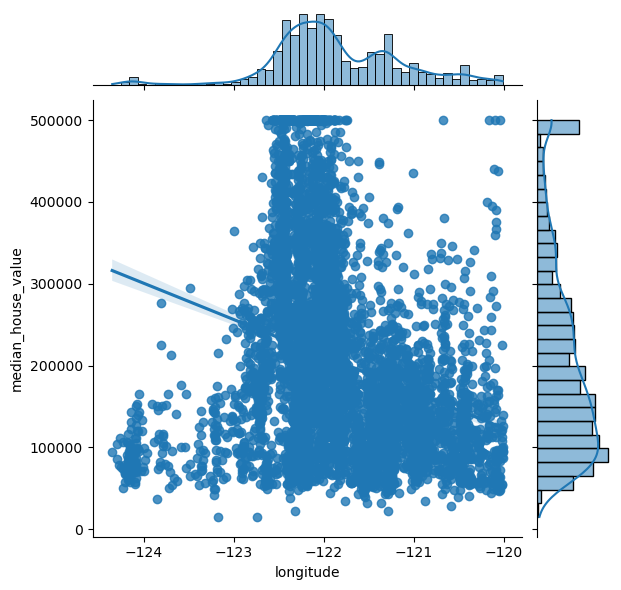

In [43]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

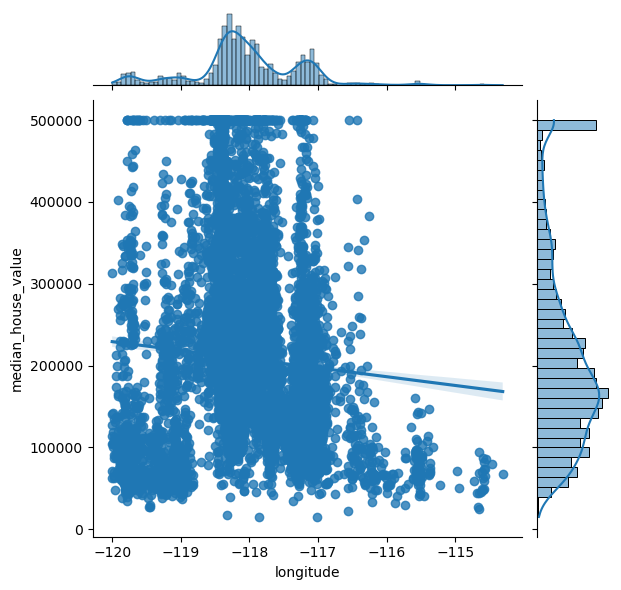

In [44]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

### Категориальные / бинарные признаки

#### box plot

plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

#### Как строится box plot

* box - от 25% до 75% квантиля
* линия в середине box - медиана
* "усы"

Как строятся "усы" - вариантов масса

* среднее +/- 3 сигма (стандартное отклонение)
* min / max
* median +/- 1.5*(q75 - q25),
* ...
* Интерквартильный размах = q75 - q25

### Матрица корреляций

* Показывает линейную связь между переменными
* Изменяется от -1 до 1
* Корреляция - мера только линейной связи

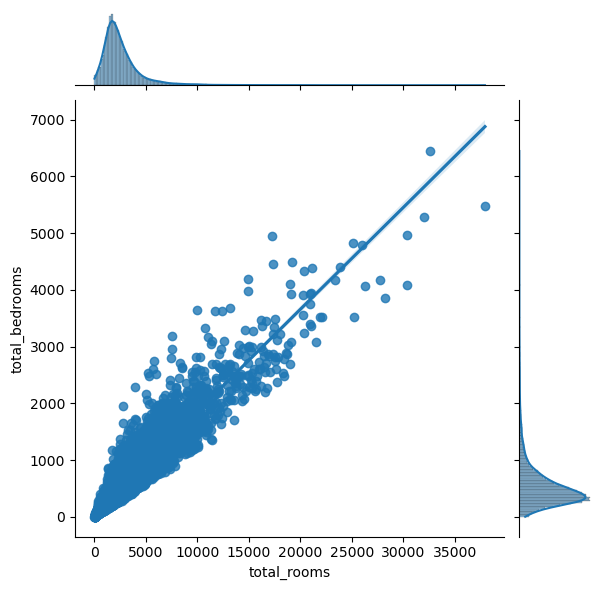

In [45]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

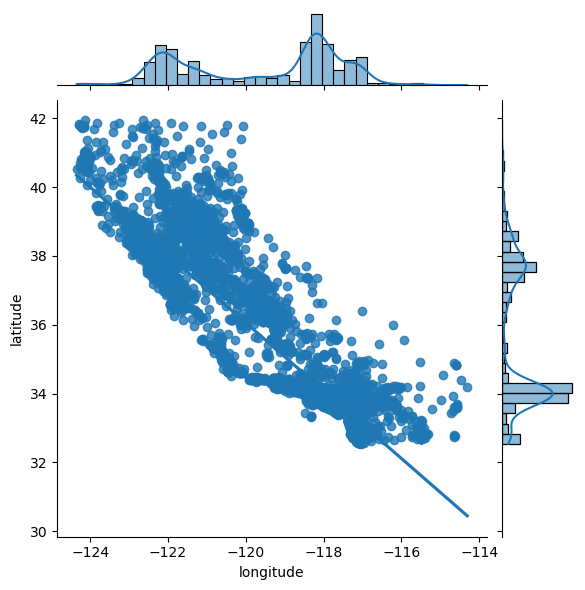

In [46]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [47]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
housing_median_age,0.0,0.0,1.0,-0.4,-0.3,-0.3,-0.3,0.0,0.0
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.0,0.0
total_bedrooms,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
population,0.0,0.0,-0.3,0.9,0.9,1.0,0.9,0.0,0.0
households,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
median_income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7
median_house_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,1.0


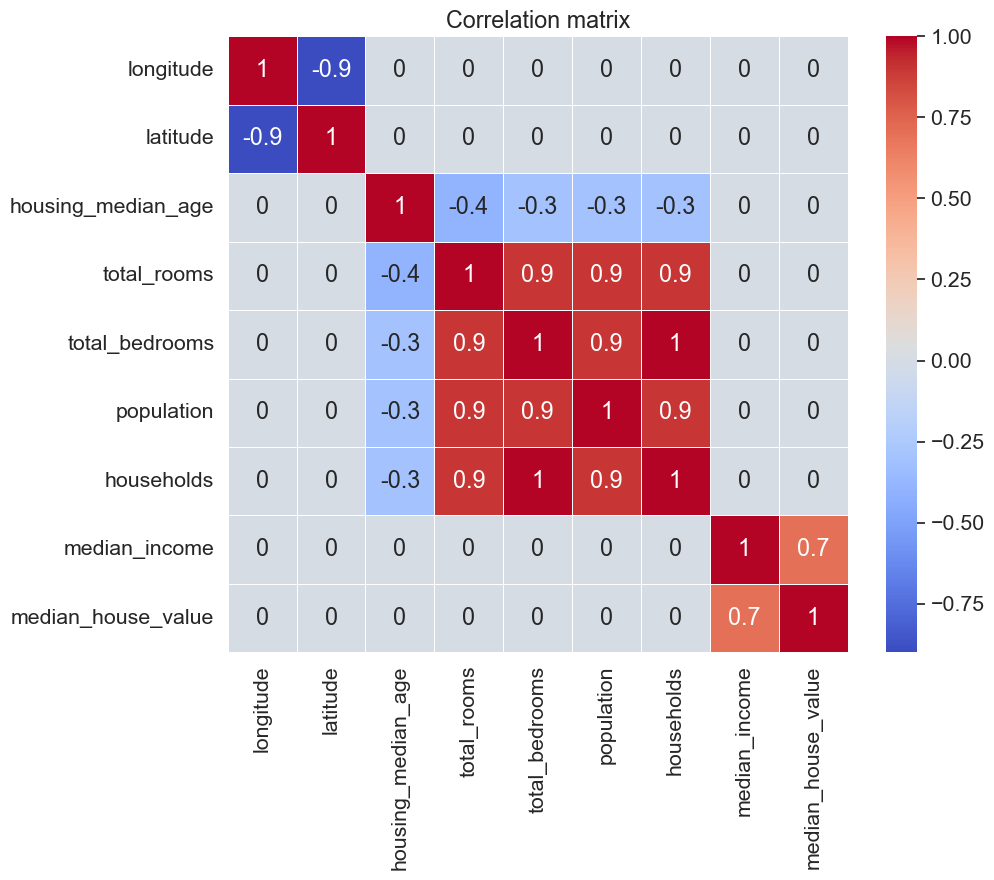

In [48]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Гео данные

In [49]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

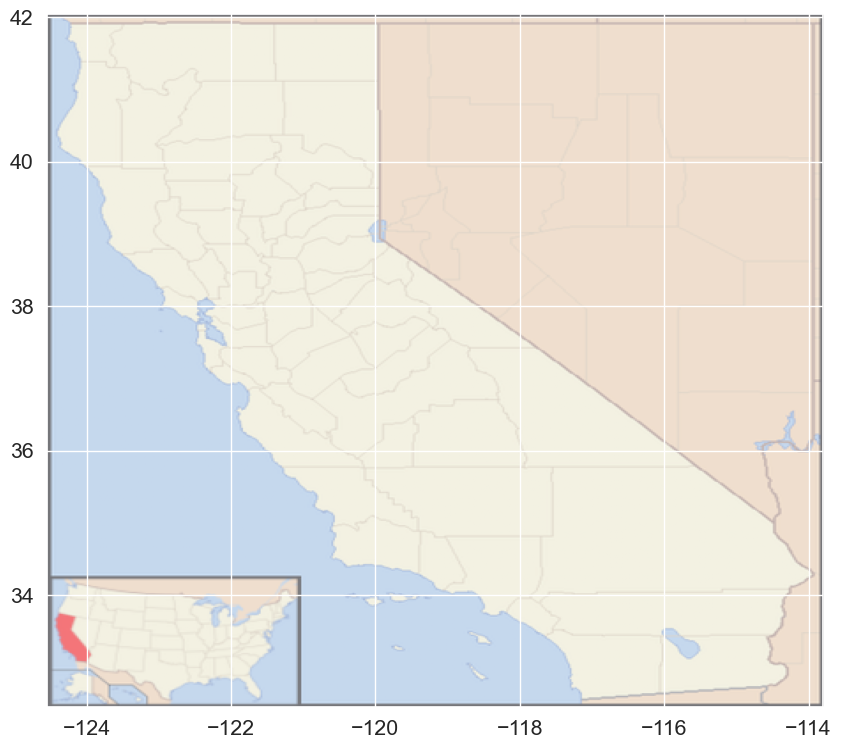

In [50]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

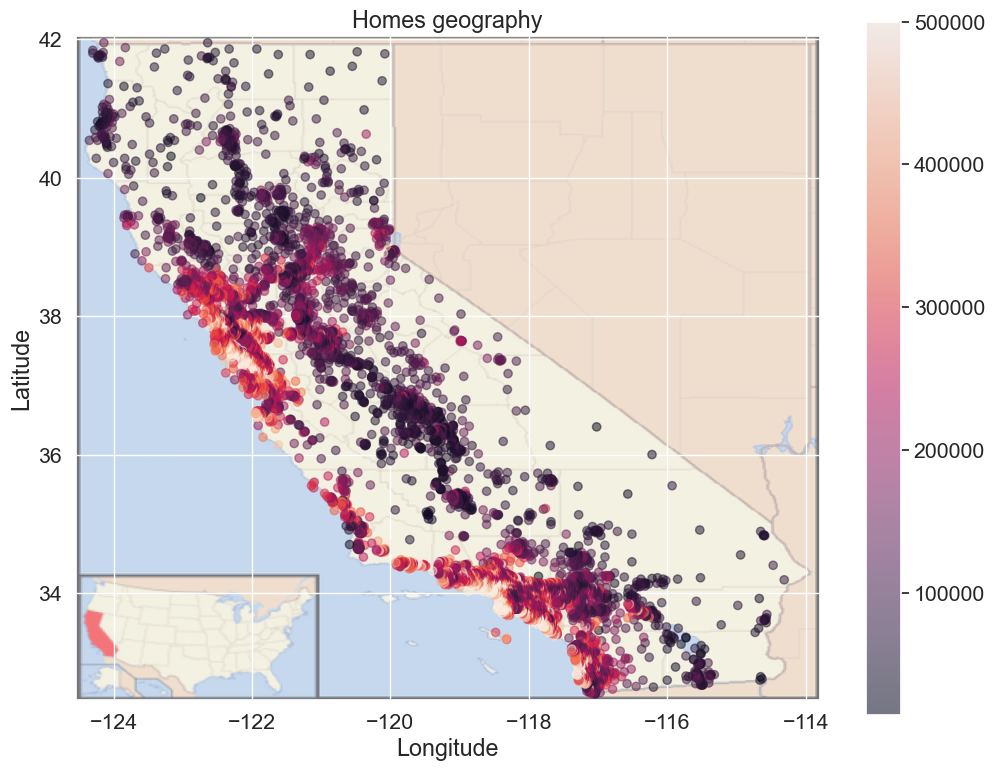

In [51]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

### Folium

In [52]:
# !pip install folium

import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

### Kepler**

In [ ]:
!conda install -c conda-forge keplergl

In [ ]:
!pip install keplergl==0.1.1

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter

Map saved to ./california.html!

### Summary

1. Матрица корреляции

2. Знакомство с признаками

* Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
* sns.violinplot - Узнать распределение признака
* Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
* Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
* sns.jointplot - Взаимное изменение признаков
* plt.pie - Изобразить долю объектов от всего кол-ва

3. Поиск выбросов
* sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
* sns.boxplot - Всё, что выходит за пределы усов - выбросы

Seaborn - https://seaborn.pydata.org/examples/index.html

Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html